# Real and Imaginary parts of $\exp{i\beta z}$ along SDP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plotlogf
plt.style.use('dark_background')
%matplotlib widget

In [2]:
A = SlabExact(scale=1e-6, Ts=[2., 2., 2.], xrefs=[300, 500, 300],
              ns=[1.44, 1, 1.44], wl=4e-6, symmetric=True)


In [4]:
xs, ys = np.linspace(-10, 10, 1001), np.linspace(-5, 5, 1001)
Xs, Ys = np.meshgrid(xs, ys)
Zs = Xs + 1j * Ys
iBetas = 1j * A.Beta_from_Z(Zs)

In [5]:
sdp_ys = A.sdp_Z(xs)

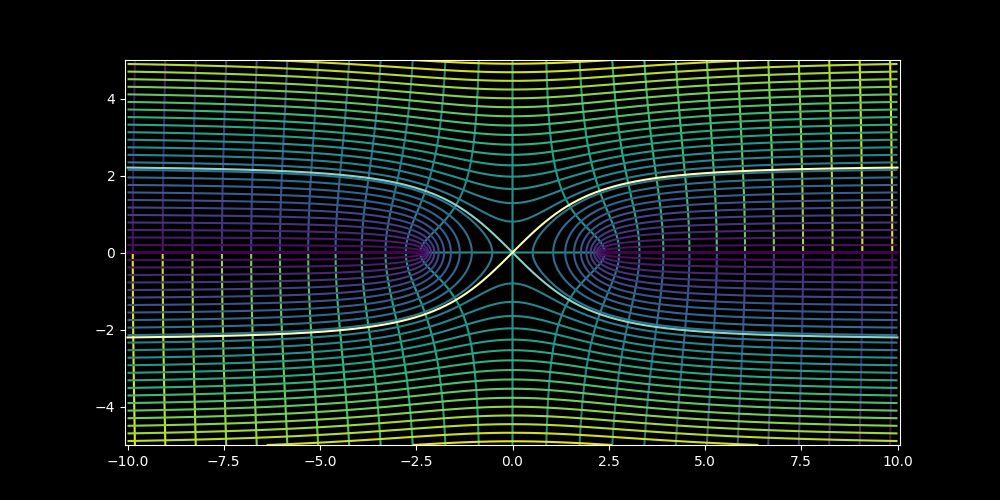

In [20]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(10,5))
ax.contour(Xs, Ys, iBetas.real, levels=30)
ax.contour(Xs, Ys, iBetas.imag, levels=30);
ax.plot(xs, sdp_ys)
ax.plot(xs, -sdp_ys)
plt.axis('equal');

In [74]:
sdp_Zs = xs + 1j * sdp_ys
z0 = 10
sdp_betas = 1j * z0 * ( A.Beta_from_Z(sdp_Zs)) 
exp_i_beta_z_sdp = np.exp(sdp_betas)


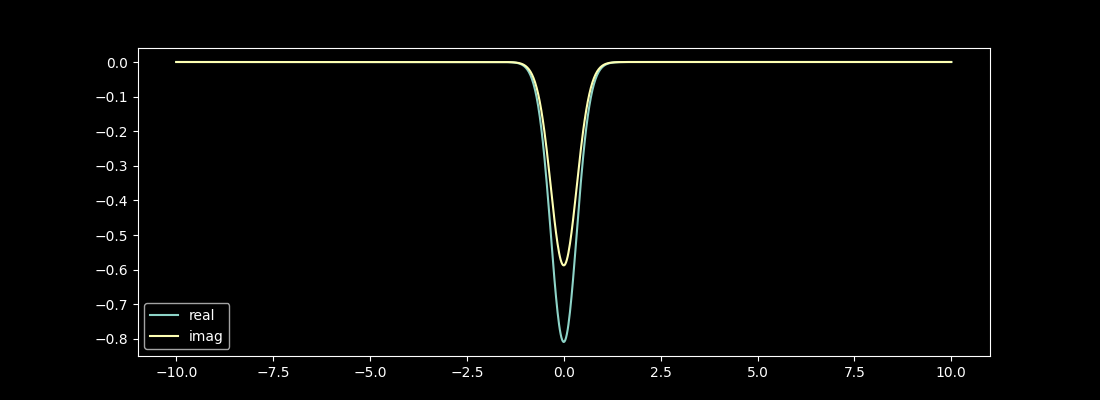

In [75]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(11,4))
ax.plot(xs, exp_i_beta_z_sdp.real, label='real')
ax.plot(xs, exp_i_beta_z_sdp.imag, label='imag')
# ax.plot(xs, sdp_betas.real, label='real')
# ax.plot(xs, sdp_betas.imag, label='imag')
# plt.axis('equal');
plt.legend();

We pull out some pieces from the integral to get this:
$$
\begin{align}
I(z) & =\int_C f(Z) e^{z g(Z)} d Z \\
& =e^{z g\left(Z_0\right)} \int_C f(Z) e^{z\left[g(Z)-g\left(Z_0\right)\right]} d Z \\
& =e^{z g\left(Z_0\right)} \int_C f(Z) e^{i z \left[v(Z) - v\left(Z_0\right)\right]} e^{z\left[u(Z)-u\left(Z_0\right)\right]} d Z
\end{align}
$$

where $$g(Z) = u(Z) + i v(Z)$$.

In [76]:
sdp_Zs = xs + 1j * sdp_ys
z0 = 10
sdp_betas = 1j * z0 * ( A.Beta_from_Z(sdp_Zs) - A.Beta_from_Z(0)) 
exp_i_beta_z_sdp = np.exp(sdp_betas)


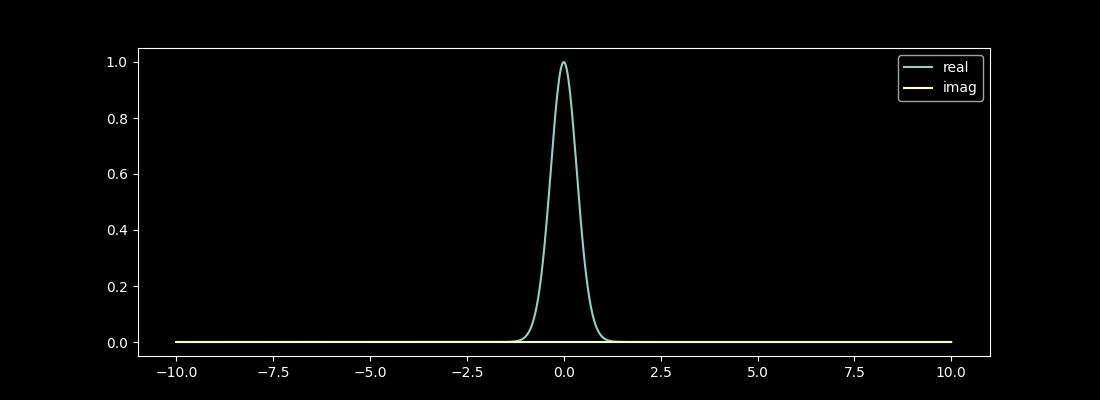

In [77]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(11,4))
ax.plot(xs, exp_i_beta_z_sdp.real, label='real')
ax.plot(xs, exp_i_beta_z_sdp.imag, label='imag')
# ax.plot(xs, sdp_betas.real, label='real')
# ax.plot(xs, sdp_betas.imag, label='imag')
# plt.axis('equal');
plt.legend();